In [1]:
import pandas as pd
import numpy as np
from scipy import *
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bigdata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
data1 = pd.read_excel (r'./Matric_Couverture3_evolution.xlsx', index_col=None, header=None)
data1

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data = pd.DataFrame(data1)
data

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data = data.iloc[0:2]
data

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...


In [41]:
data=data.transpose()
data

,0,1
0,Evolution:,NaN
1,0,le système affiche les boutons des réseaux soc...
2,0,"sur le logo depuis une page intérieure, le sys..."
3,2,"Sur le logo depuis la page daccueil, le systè..."
4,0,Si lutilisateur clique sur le bouton daccess...
5,0,Un clic sur un bouton de réseaux sociaux perme...
6,3,Le système affiche :
7,0,"Au clic sur la langue sélectionnée, le système..."
8,0,"Si la langue sélectionnée est français, le sys..."
9,0,"Si la langue sélectionnée est anglais, le syst..."


In [42]:
data = data[[1, 0]]
data

,1,0
0,NaN,Evolution:
1,le système affiche les boutons des réseaux soc...,0
2,"sur le logo depuis une page intérieure, le sys...",0
3,"Sur le logo depuis la page daccueil, le systè...",2
4,Si lutilisateur clique sur le bouton daccess...,0
5,Un clic sur un bouton de réseaux sociaux perme...,0
6,Le système affiche :,3
7,"Au clic sur la langue sélectionnée, le système...",0
8,"Si la langue sélectionnée est français, le sys...",0
9,"Si la langue sélectionnée est anglais, le syst...",0


In [43]:
data.columns = ["texte", "Evolution"]
data

,texte,Evolution
0,NaN,Evolution:
1,le système affiche les boutons des réseaux soc...,0
2,"sur le logo depuis une page intérieure, le sys...",0
3,"Sur le logo depuis la page daccueil, le systè...",2
4,Si lutilisateur clique sur le bouton daccess...,0
5,Un clic sur un bouton de réseaux sociaux perme...,0
6,Le système affiche :,3
7,"Au clic sur la langue sélectionnée, le système...",0
8,"Si la langue sélectionnée est français, le sys...",0
9,"Si la langue sélectionnée est anglais, le syst...",0


In [44]:
data=data.drop(index=0)
data

,texte,Evolution
1,le système affiche les boutons des réseaux soc...,0
2,"sur le logo depuis une page intérieure, le sys...",0
3,"Sur le logo depuis la page daccueil, le systè...",2
4,Si lutilisateur clique sur le bouton daccess...,0
5,Un clic sur un bouton de réseaux sociaux perme...,0
6,Le système affiche :,3
7,"Au clic sur la langue sélectionnée, le système...",0
8,"Si la langue sélectionnée est français, le sys...",0
9,"Si la langue sélectionnée est anglais, le syst...",0
10,"Si la langue sélectionnée est espagnol, le sys...",0


In [ ]:
# Extraction des caractéristiques en limitant le nombre de feature à 500
from nltk.corpus import stopwords

vec = TfidfVectorizer(max_features=500, lowercase=True, analyzer='word', stop_words=stopwords.words('french'),ngram_range=(1,4))
vec.fit(data['texte'].values)
features = vec.transform(data['texte'].values)
features

In [24]:
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
#Construction d'un clustering de 4 clusters
random_state = 0 

nbc=4
model = MiniBatchKMeans(n_clusters=nbc, random_state=random_state)
model.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [26]:
# Affichons les termes communs à chaque cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(nbc):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 clic
 bouton
 clic bouton
 élément
 utilisateur
 lance
 clic flèche
 vidéo
 redirigé vers
 redirigé
Cluster 1:
 cas utilisation
 utilisation
 cas
 page
 voir cas
 voir cas utilisation
 voir
 redirige
 système redirige
 vers
Cluster 2:
 système affiche
 système
 affiche
 chaque
 si
 entité
 élément
 événement
 entités
 suivants
Cluster 3:
 champ
 peut
 affiché
 si
 utilisateur
 date
 affichés
 entités
 être
 sélectionner


In [27]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0] 

In [28]:
data.texte[ClusterIndicesNumpy(0, model.labels_) ]

4       Si lutilisateur clique sur le bouton daccess...
10      Si la langue sélectionnée est espagnol, le sys...
20      Le fil dariane est composé dun lien vers la ...
21      Au clic sur le bouton de partage, un menu supp...
22      Au clic sur le bouton Facebook, lévénement es...
27      le menu est affiché en haut de la fenêtre navi...
28              Au clic sur lune des entrées de niveau 1
43                                 Informations pratiques
45      Informations pratiques (voir cas dutilisation...
52      Lutilisateur peut modifier lordre daffichag...
53      Un clic sur un lien permet à lutilisateur da...
57                               Un bouton En savoir plus
70      Au clic dans une page sur le logo présent dans...
75      Le système affiche dans lordre suivant les él...
79      Limage de remplacement et le texte spécifique...
80      Au clic sur cette icône, la vidéo saffiche et...
145     Un bouton Lire la suite est affiché sous le pr...
147           

In [29]:
data.texte[ClusterIndicesNumpy(1, model.labels_) ]

1       le système affiche les boutons des réseaux soc...
3       Sur le logo depuis la page daccueil, le systè...
12        Si la page est traduite, celle-ci est affichée.
13      \tle système redirige vers la page parente tr...
14      \tSi la page parente de niveau N-1 nest pas ...
16      Le système affiche pour chaque langue ci-desso...
44      Au clic sur chaque élément, une pop-in souvre...
60      Les contenus à afficher sont affichés en prior...
61      Le contributeur se place en mode liste sur le ...
62      Cas dutilisation décrivant la contribution po...
66      Il nest pas possible de supprimer un type de ...
67      Le contributeur se place en mode liste sur le ...
68      \tLe bloc Identitaire (voir cas dutilisation...
69      \tLe bloc Plan daccès / infos pratiques (voi...
73      Les entités informations temps réel sont affic...
86        Dans la barre de navigation, le système affiche
94      Si lévénement a plusieurs créneaux, le crénea...
97         Pou

In [30]:
data.texte[ClusterIndicesNumpy(2, model.labels_) ]

0                                                     NaN
2       sur le logo depuis une page intérieure, le sys...
5       Un clic sur un bouton de réseaux sociaux perme...
6                                    Le système affiche :
7       Au clic sur la langue sélectionnée, le système...
8       Si la langue sélectionnée est français, le sys...
9       Si la langue sélectionnée est anglais, le syst...
15      \tSi la page parente de niveau N-2 nest pas ...
41         Lutilisateur peut traduire une page existante
55      Le contributeur peut ajouter toute page dans l...
74      Cas dutilisation permettant à un internaute  ...
77      Si un champ n'est pas renseigné, il n'est pas ...
81      Au clic sur le texte, la vidéo saffiche et se...
82      Le système affiche les entités Carrousel triée...
83      Par défaut, le système affiche le contenu de l...
84           Pour chaque entité le système affiche soit :
85      Dans le bloc de contenu mis  en avant, le syst...
88      Au rol

In [31]:
data.texte[ClusterIndicesNumpy(3, model.labels_) ]

11      Au clic sur la deuxième ou troisième langue, l...
17      Le contributeur se place en mode liste sur le ...
18      Nom du champ\t\tType de champ\tobligatoire\tCo...
19      Un fil dAriane est présent sur toutes les pag...
23      Au clic sur le bouton Twitter, lévénement est...
24                                        Date / Horaires
25                                        Infos pratiques
26                                               Soutenir
29      Au clic sur licône Etoile, lutilisateur est ...
30      Les rubriques de niveau 2 saffichent mais ne ...
31      Les rubriques de niveau 3 saffichent et sont ...
32           Lutilisateur peut créer un lien de niveau 1
33           Lutilisateur peut créer un lien de niveau 2
34      Une page nouvellement créée en back-office est...
35      2 boutons de pages peuvent être contribués pou...
36      Si lutilisateur a sélectionné anglais ou espa...
37                Aucun contenu en français nest affiché
38      Si lu

In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=model.predict(features))

0.035511285634523965

In [33]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

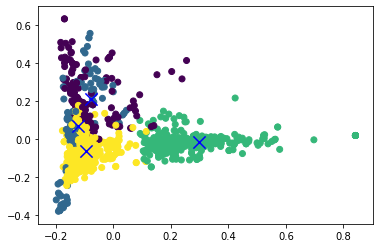

In [34]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

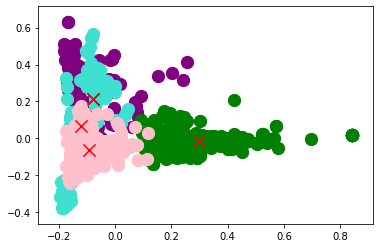

In [35]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(features.toarray())

plt.scatter(acp[:,0], acp[:,1], c=model.predict(features))
acp_cluster_centers = pca.transform(model.cluster_centers_)
for couleur,k in zip(['purple','turquoise','green','pink'],[0,1,2,3]):
    plt.scatter(acp[model.labels_==k,0],acp[model.labels_==k,1],s=150,c=couleur)
    plt.scatter(acp_cluster_centers[:, 0], acp_cluster_centers[:,1], marker='x', s=150, c='red')
plt.show() 

In [36]:
from sklearn.metrics import homogeneity_score
homogeneity_score(data.Evolution, model.predict(features))

0.024917212652924826